In [1]:
%pylab inline
import pandas as pd
import json
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


In [2]:
user_df = pd.read_json('yelp_academic_dataset_user.json', lines = True)
user_df.head(n=3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
0,3.59,4192,79,4192,3904,19,305,4705,1347,2617,...,"[2017, 2015, 2016, 2014, 2011, 2013, 2012]",298,"[iJg9ekPzF9lkMuvjKYX6uA, ctWAuzS04Xu0lke2Rop4l...",12316,Rob,761,user,18456,EZmocAborM6z66rTzeZxzQ,2009-09-12
1,4.29,144,11,144,64,1,4,97,24,129,...,[None],34,"[r2UUCzGxqI6WPsiWPgqG2A, qewG3X2O4X6JKskxyyqFw...",28,Vivian,80,user,117,myql3o3x22_ygECb8gVo7A,2009-06-27
2,4.15,36,1,36,14,2,10,21,4,23,...,"[2011, 2016, 2017, 2013, 2014, 2015, 2012]",48,"[qewG3X2O4X6JKskxyyqFwQ, -50XWnmQGqBgEI-9ANvLl...",6,Carol,841,user,58,FIk4lQQu1eTe2EpzQ4xhBA,2010-08-26


In [3]:
rev_df = pd.read_csv('yelp_reviews.csv', index_col=0)
rev_df.head()

,business_id,date,stars,user_id
0,2aFiy99vNLklCx3T_tGS9A,2011-10-10,5,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,2010-12-29,5,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,2011-04-29,5,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,2014-07-14,5,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,2014-01-15,4,YOo-Cip8HqvKp_p9nEGphw


In [4]:
rev_user_df = rev_df.merge(user_df, on='user_id')
rev_user_df.head()

,business_id,date,stars,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,...,cool,elite,fans,friends,funny,name,review_count,type,useful,yelping_since
0,2aFiy99vNLklCx3T_tGS9A,2011-10-10,5,KpkOkG6RIf4Ra25Lhhxf1A,3.67,0,0,0,0,0,...,0,[None],1,[None],0,Ira,2,user,0,2011-10-01
1,2aFiy99vNLklCx3T_tGS9A,2010-12-29,5,bQ7fQq1otn9hKX-gXRsrgA,4.25,1,0,1,0,0,...,16,[None],2,"[blAV9AQR99KHGORqZPx52w, -xZ03XW1vorzhXI8hZGzZ...",1,Rachel,81,user,28,2010-08-31
2,2aFiy99vNLklCx3T_tGS9A,2011-04-29,5,r1NUhdNmL6yU9Bn-Yx6FTw,3.67,0,0,0,0,0,...,1,[None],0,"[9RZSq0aVuLLD6jvIh2TzqQ, zRCAao7JaTDfvedKWDvOq...",0,Aubrey,3,user,0,2011-04-29
3,2LfIuF3_sX6uwe-IR-P0jQ,2014-07-14,5,aW3ix1KNZAvoM8q-WghA3Q,4.40,0,0,0,0,0,...,0,[None],1,"[eopGbF5w7k_BHZLs6r7ETQ, rml4nXVWcvFhobSXzJ57Q...",0,Alejandro,10,user,14,2011-03-21
4,2LfIuF3_sX6uwe-IR-P0jQ,2014-01-15,4,YOo-Cip8HqvKp_p9nEGphw,4.45,0,0,0,0,0,...,0,[None],0,"[Xui9z4DLd88pJvoMU3TGKQ, OEEdk5PBoXrAICL-DOtr_...",1,Jared,10,user,0,2011-10-28


In [5]:
business_df = pd.read_csv('business_data_with_dummy_variables.csv', index_col=0, encoding='iso-8859-1')
business_df.head()

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,Sushi Bars,Ice Cream & Frozen Yogurt,Eastern European,Television Service Providers,Musicians,Packing Services,Roof Inspectors,Discount Store,Milkshake Bars,Signmaking
0,0,"227 E Baseline Rd, Ste J2","['BikeParking: True', 'BusinessAcceptsBitcoin:...",0DI8Dt2PJp07XkVvIElIcQ,"['Tobacco Shops', 'Nightlife', 'Vape Shops', '...",Tempe,"['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",0,33.378214,-111.936102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,495 S Grand Central Pkwy,"['BusinessAcceptsBitcoin: False', 'BusinessAcc...",LTlCaCGZE14GuaUXUGbamg,"['Caterers', 'Grocery', 'Food', 'Event Plannin...",Las Vegas,"['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",1,36.192284,-115.159272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,979 Bloor Street W,"['Alcohol: none', ""Ambience: {'romantic': Fals...",EDqCEAGXVGCH4FJXgqtjqg,"['Restaurants', 'Pizza', 'Chicken Wings', 'Ita...",Toronto,"['Monday 11:0-2:0', 'Tuesday 11:0-2:0', 'Wedne...",1,43.661054,-79.429089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7014 Steubenville Pike,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",cnGIivYRLxpF7tBVR_JwWA,"['Hair Removal', 'Beauty & Spas', 'Blow Dry/Ou...",Oakdale,"['Tuesday 10:0-21:0', 'Wednesday 10:0-21:0', '...",1,40.444544,-80.174540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,321 Jarvis Street,"['BusinessAcceptsCreditCards: True', 'Restaura...",cdk-qqJ71q6P7TJTww_DSA,"['Hotels & Travel', 'Event Planning & Services...",Toronto,NaN,1,43.659829,-79.375401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = rev_user_df.merge(business_df, on='business_id', suffixes=('_user', '_bus'))
df.head()

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,...,Sushi Bars,Ice Cream & Frozen Yogurt,Eastern European,Television Service Providers,Musicians,Packing Services,Roof Inspectors,Discount Store,Milkshake Bars,Signmaking
0,2aFiy99vNLklCx3T_tGS9A,2011-10-10,5,KpkOkG6RIf4Ra25Lhhxf1A,3.67,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2aFiy99vNLklCx3T_tGS9A,2010-12-29,5,bQ7fQq1otn9hKX-gXRsrgA,4.25,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2aFiy99vNLklCx3T_tGS9A,2011-04-29,5,r1NUhdNmL6yU9Bn-Yx6FTw,3.67,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2LfIuF3_sX6uwe-IR-P0jQ,2014-07-14,5,aW3ix1KNZAvoM8q-WghA3Q,4.40,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2LfIuF3_sX6uwe-IR-P0jQ,2014-01-15,4,YOo-Cip8HqvKp_p9nEGphw,4.45,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pd.set_option('display.max_columns', 1300)
df.head(n=3)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [8]:
df['account_length'] = pd.datetime.now().date() - pd.to_datetime(df.yelping_since)
df['account_length'] = df.account_length.astype('timedelta64[D]')
df.head(n =3)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [9]:
df['account_age_at_review'] = pd.to_datetime(df.date) - pd.to_datetime(df.yelping_since)
df['account_age_at_review'] = df.account_age_at_review.astype('timedelta64[D]')
df.head(n=3)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [10]:
df['day_of_week'] = pd.to_datetime(df.date).dt.weekday
df.head(n=3)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [11]:
df['is_weekday'] = df.day_of_week < 4
df.head(n=3)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [12]:
df['is_friday'] = df.day_of_week == 4
df['is_saturday'] = df.day_of_week == 5
df['is_sunday'] = df.day_of_week == 6

In [13]:
df['is_winter'] = pd.to_datetime(df.date).dt.quarter == 1
df['is_spring'] = pd.to_datetime(df.date).dt.quarter == 2
df['is_summer'] = pd.to_datetime(df.date).dt.quarter == 3
df['is_fall'] = pd.to_datetime(df.date).dt.quarter == 4
df.head(n=1)

,business_id,date,stars_user,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name_user,review_count_user,type_user,useful,yelping_since,index,address,attributes,categories,city,hours,is_open,latitude,longitude,name_bus,neighborhood,postal_code,review_count_bus,stars_bus,state,type_bus,Environmental Testing,IV Hydration,Art Restoration,Backshop,Pulmonologist,Workers Compensation Law,Dentists,Tennis,Czech,LAN Centers,Caribbean,Public Transportation,Cannabis Tours,Linens,Beer,Market Stalls,Duty-Free Shops,Leisure Centers,3D Printing,Town Car Service,Club Crawl,Midwives,Powder Coating,First Aid Classes,Street Art,Party Bus Rentals,Periodontists,Gymnastics,Cosmetic Surgeons,Embroidery & Crochet,Korean,Breakfast & Brunch,Cosmetology Schools,Gas & Service Stations,Internal Medicine,Golf Equipment,Shoe Shine,Waxing,Banks & Credit Unions,Seafood Markets,Storefront Clinics,Casinos,Watches,Childbirth Education,Auto Detailing,Soul Food,Surgeons,Flooring,Vehicle Shipping,Laboratory Testing,Horse Boarding,Orthopedists,Prosthodontists,Rest Stops,Scavenger Hunts,Christmas Markets,Nightlife,Filipino,Water Delivery,Tanning,Printing Services,Carpet Installation,Skating Rinks,Family Practice,Party Bike Rentals,Burgers,Acne Treatment,Popcorn Shops,Tutoring Centers,Bagels,DJs,Bespoke Clothing,Dental Hygienists,Ophthalmologists,Solar Installation,Editorial Services,Outlet Stores,Oriental,Recording & Rehearsal Studios,Auto Repair,Smog Check Stations,Auto Upholstery,Blood & Plasma Donation Centers,Scooter Tours,Fireworks,Lingerie,Candy Stores,Piercing,Cards & Stationery,Private Jet Charter,Lounges,Ukrainian,Caricatures,Greek,Party Equipment Rentals,Pedicabs,Karate,Boxing,Sandwiches,Home Services,Themed Cafes,Music & Video,Car Rental,Permanent Makeup,Fashion,Auto Glass Services,Moroccan,Comic Books,Scottish,Water Stores,Car Buyers,Trusts,Halotherapy,Beer Gardens,Pop-Up Restaurants,Roofing,Fabric Stores,Tex-Mex,Meditation Centers,Food Delivery Services,Bail Bondsmen,Medical Law,Rugs,Car Wash,Transmission Repair,Circuit Training Gyms,Gyms,Gardeners,Argentine,Animal Physical Therapy,Community Gardens,Animal Shelters,Ayurveda,Apartments,Magicians,Food Banks,Legal Services,Beach Bars,Hydro-jetting,Yelp Events,Structural Engineers,Barbers,Cafes,Check Cashing/Pay-day Loans,Airports,Carpeting,Propane,Donairs,Junk Removal & Hauling,Medical Cannabis Referrals,Attraction Farms,Bookbinding,Spin Classes,Parent Cafes,Stucco Services,Homeowner Association,Ski Schools,Psychics & Astrologers,Bike Rentals,Libraries,Framing,Employment Law,Orthotics,Coffee Roasteries,Endodontists,Public Relations,Neurotologists,Delis,Pet Training,Pediatric Dentists,Arts & Crafts,Auction Houses,Delicatessen,Tours,Laser Hair Removal,CSA,Oncologist,Tapas Bars,Henna Artists,Cultural Center,Fruits & Veggies,Wholesale Stores,Used,ATV Rentals/Tours,Izakaya,Shoe Stores,Pet Breeders,Lawyers,Painters,Churches,Dominican,Clothing Rental,Food Court,Spine Surgeons,Rotisserie Chicken,Bowling,Ranches,Bars,Mountain Biking,Bike Sharing,Pool Cleaners,Security Services,French,Valet Services,Chocolatiers & Shops,Alsatian,Egyptian,Shared Office Spaces,Rheumatologists,Flatbread,Horse Equipment Shops,Mexican,Sports Medicine,Officiants,Guitar Stores,Taxidermy,Uniforms,Vegetarian,Drugstores,Dance Studios,Fitness/Exercise Equipment,Assisted Living Facilities,General Dentistry,Fondue,Chicken Shop,Photographers,Talent Agencies,Bookstores,Zoos,Doulas,Baby Gear & Furniture,Baden,Go Karts,Cideries,Session Photography,Ethic Grocery,Real Estate Services,Cooking Classes,Badminton,Day Spas,Bed & Breakfast,Acupuncture,Diagnostic Imaging,Arcades,Wheel & Rim Repair,Junkyards,Obstetricians & Gynecologists,Music Production Services,Religious Items,Emergency Medicine,Tickets,Restaurant Supplies,Bistros,House Sitters,Pawn Shops,Colombian,Canadian

In [14]:
df = df[df.account_age_at_review >= 0]

In [15]:
dropped_columns = list(df.columns)[:42]
dropped_columns.append(list(df.columns)[-11])

In [16]:
X = df.drop(dropped_columns, axis=1).astype(int)
y = df.stars_user
X.head()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X).astype(int), columns=X.columns, index=X.index)
y = y.values.reshape(-1, 1)
y = pd.DataFrame(scaler.fit_transform(y), columns=['stars_user'], index=X.index)

C:\Users\Reilly Proudsworth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [17]:
y.head()

,stars_user
0,1.00
1,1.00
2,1.00
3,1.00
4,0.75


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
##  Use mix/max scalar for normalizing
lasso = Lasso(alpha=1)
lasso

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
lasso = lasso.fit(X_train, y_train)
lasso

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
ypred = lasso.predict(X_test)

In [31]:
lasso.score(X_test, y_test)

-0.00016974662549218422

In [22]:
##pd.DataFrame(np.array([y_test, ypred]).T, columns=['y_test', 'ypred']).head()

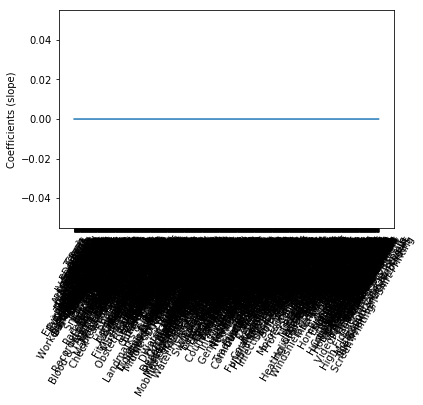

In [23]:
plt.plot(range(len(X_train.columns)), lasso_coefs)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.ylabel('Coefficients (slope)')
plt.show()

In [24]:
coef = pd.DataFrame(np.array([X_train.columns, lasso_coefs]).T, columns=['feature_names', 'lasso_coeff'], index=X_train.columns)
print(coef.feature_names[coef.lasso_coeff.abs().argmax()])
coef.lasso_coeff.abs().sort_values(ascending=False)

Environmental Testing


is_fall                           0
College Counseling                0
Social Clubs                      0
Home Organization                 0
Home Inspectors                   0
Castles                           0
Spiritual Shop                    0
Laotian                           0
Shanghainese                      0
Adoption Services                 0
RV Parks                          0
Door Sales/Installation           0
IP & Internet Law                 0
Speech Therapists                 0
Local Services                    0
Hostels                           0
Cardiologists                     0
Tires                             0
Gay Bars                          0
Basketball Courts                 0
Gluten-Free                       0
American (New)                    0
Education                         0
Real Estate Law                   0
Fertility                         0
Vape Shops                        0
Bartending Schools                0
Aerial Fitness              

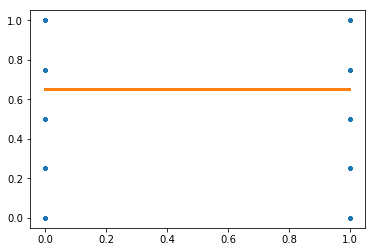

In [25]:
plt.plot(X_test, y_test, marker='.', linestyle='none')
plt.plot(X_test, ypred)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC59514BA8>]], dtype=object)

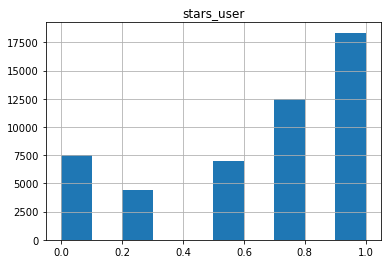

In [34]:
y.hist()

In [35]:
lasso.intercept_

array([ 0.64955968])

In [33]:
ridge = Ridge(alpha=0.25)
ridge

Ridge(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
ridge.fit(X_train, y_train)
ypred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.075367009268578422

In [28]:
##pd.DataFrame(np.array([y_test, ypred]).T, columns=['y_test', 'ypred']).head()

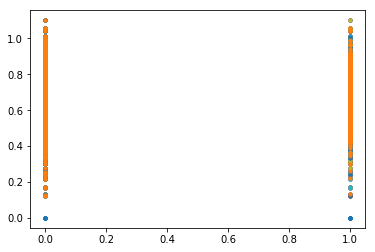

In [29]:
plt.plot(X_test, y_test, marker='.', linestyle='none')
plt.plot(X_test, ypred, marker='.', linestyle='none')
plt.show()

In [36]:
from sklearn.linear_model import SGDRegressor

In [37]:
sgdr = SGDRegressor(alpha=0.01, eta0=0.1, n_iter=1000)
sgdr

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [ ]:
sgdr = sgdr.fit(X_train, y_train)
sgdr

C:\Users\Reilly Proudsworth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ypred = sgdr.predict(X)

In [ ]:
pd.DataFrame(np.array([y, ypred]).T, columns=['y', 'ypred']).head()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lr.score(X_train, y_train)

0.11741964367146708

In [44]:
everything = pd.concat([y_train, X_train], axis=1)

In [45]:
everything.corr()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [46]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=30)

In [52]:
X10_train = pca.fit_transform(X_train)

In [55]:
lr = LinearRegression(normalize=True)
lr.fit(X10_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [56]:
lr.score(X10_train, y_train)

0.029214397715783161

In [60]:
lr.coef_

array([[-0.01070322,  0.07078963, -0.0048942 ,  0.00903956,  0.00213322,
         0.00416908,  0.03839028,  0.02782719, -0.03426934,  0.01596043,
         0.01161053, -0.00826216,  0.07882034, -0.01423957,  0.05714327,
        -0.00440211, -0.01727044,  0.0183863 ,  0.03671605,  0.0518263 ,
        -0.02093022, -0.0172251 ,  0.02054352, -0.03782188,  0.13848809,
        -0.03689605,  0.02126197, -0.02807832, -0.06155499,  0.00439059]])

In [ ]:
lrpred = lr.predict(X)

In [ ]:
pd.DataFrame(np.array([y, lrpred]).T, columns=['y', 'lrpred']).corr()

In [ ]:
X.head()

In [ ]:
xy = X.copy()
xy['stars'] = y
print(xy.corr().stars)
xy.corr().stars.abs().sort_values()